# EECS 16A Summer 2024 Homework 7

In [1]:
from __future__ import division
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


## Mechanical Least Squares - Optional IPython code for plotting

In [2]:
# use for plotting
a = np.array([2,4,6,8])
b = np.array([2,6,7,8])

### Part (a)

In [ ]:
# find a linear model of the form:   b = xa
# According to the least squares formula, we can calculate x
# xhat =(a.T*a)^(-1)*a.T*b
xhat = (1/np.dot(a,a))*np.dot(a,b)
print('xhat: '+str(xhat))
bhat = xhat*a

# Calculate squared error
se = np.dot(b-bhat,b-bhat)
print('the squared error is '+str(se))

In [ ]:
#HERE IS HOW TO PLOT POINTS
plt.plot(a,b,'ob') 
#HERE IS HOW TO PLOT A LINE
plt.plot(a,bhat,'-r')
#HERE IS HOW TO CHANGE THE LIMITS OF THE PLOTTING WINDOW
plt.xlim([0,9]); plt.ylim([0,9]);

### Part (b)

In [ ]:
# The augmented A matrix is given by
a2 = a.copy()
b2 = b.copy()
A2 = np.vstack([a2,np.ones(len(a2))]).T
print('The augmented A matrix is')
print(A2)
# by the least squares formula we can calculate xhat
xhat2 = np.dot(np.linalg.inv(np.dot(A2.T,A2)),np.dot(A2.T,b2))
print('xhat:')
print(xhat2)
# The squared error is given by
bhat2 = np.dot(A2,xhat2)
se2 = np.dot(b2 - bhat2,b2-bhat2)
print('the squared error is '+str(se2))

In [ ]:
#HERE IS HOW TO PLOT POINTS
plt.plot(a2,b2,'ob') 
#HERE IS HOW TO PLOT A LINE
plt.plot(a2,bhat2,'-r')
#HERE IS HOW TO CHANGE THE LIMITS OF THE PLOTTING WINDOW
plt.xlim([0,9]); plt.ylim([0,9]);
print('By adding a b-intercept we have definitely improved the fit.')
print('This can be seen in the graph as well as the value of the squared error')

##  Audio File Matching

This notebook continues the audio file matching problem. Be sure to have song.wav and clip.wav in the same directory as the notebook.

In this notebook, we will look at the problem of searching for a small audio clip inside a song.

The song "Mandelbrot Set" by Jonathan Coulton is licensed under <a href="http://creativecommons.org/licenses/by-nc/3.0/">CC BY-NC 3.0</a>

If you have trouble playing the audio file in IPython, try opening it in a different browser. I encountered problem with Safari but Chrome works for me.

### Setup

In [ ]:
import numpy as np
import wave
import matplotlib.pyplot as plt
import scipy.io.wavfile
import operator
from IPython.display import Audio
%matplotlib inline

given_file = 'song.wav'
target_file = 'clip.wav'
rate_given,  given_signal  = scipy.io.wavfile.read(given_file)
rate_target, target_signal = scipy.io.wavfile.read(target_file)
given_signal  = given_signal[:2000000].astype(float)
target_signal = target_signal.astype(float)
def play_clip(start, end, signal=given_signal):
    scipy.io.wavfile.write('temp.wav', rate_given, signal[start:end].astype(np.int16))
    return Audio(url='temp.wav', autoplay=True)

def run_comparison(target_signal, given_signal, idxs=None):
    # Run everything if not called with idxs set to something
    if idxs is None:
        idxs = [i for i in range(len(given_signal)-len(target_signal))]
    return idxs, [vector_compare(target_signal, given_signal[i:i+len(target_signal)])
                for i in idxs]

play_clip(0, len(given_signal))

#scipy.io.wavfile.write(target_file, rate_given, (-0.125*given_signal[1380000:1380000+70000]).astype(np.int16))

We will load the song into the variable `given_signal` and load the short clip into the variable `target_signal`. Your job is to finish code that will identify the short clip's location in the song. The clip we are trying to find will play after executing the following block.

In [ ]:
Audio(url=target_file, autoplay=True)

### Part (e)
Your task is to define the function 'vector_compare' and run the following code. Because the song has a lot of data, you should use the provided examples from the previous parts of the problem before running the later code. Do you results here make sense given your answers to previous parts of the problem?

In [ ]:
def vector_compare(desired_vec, test_vec):
    """This function compares two vectors, returning a number.
    The test vector with the highest return value is regarded as being closest to the desired vector."""
   #YOUR CODE HERE

print("Vector compare test examples:")
print(vector_compare(np.array([1,1,1]), np.array([1,1,1])))
print(vector_compare(np.array([1,1,1]), np.array([-1,-1,-1])))
print(vector_compare(np.array([1,1,1]), np.array([-1,1,-1])))

Run the following code that runs `vector_compare` on every subsequence in the song- it will probably take at least 5 minutes. How do you interpret this plot to find where the clip is in the song?

In [ ]:
import time

t0 = time.time()
idxs, song_compare = run_comparison(target_signal, given_signal)
t1 = time.time()
plt.plot(idxs, song_compare)
print ("That took %(time).2f minutes to run" % {'time':(t1-t0)/60.0} )

In the space below, write code that uses `song_compare` to print the index of `given_signal` where `target_signal` begins. Then, verify that your answer is correct by playing the song at that index using the `play_clip` function.

In [ ]:
#YOUR CODE HERE

## GPS Receivers

In [8]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


In [9]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    shamt = delay[satellite_ID - 1]
    G2_out = np.roll(MLS2,shamt)
    
    CA_code = G1_out * G2_out
    
    return CA_code

### Part (a)

<ipython-input-10-db404f9e8e9e>:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ind_10,self_10)


<StemContainer object of 3 artists>

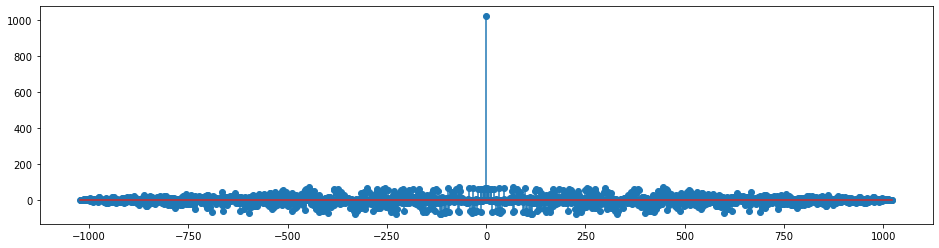

In [10]:
def array_correlation(array1,array2):
    """ This function should return two arrays or a matrix with one row corresponding to 
    the offset and other to the correlation value. array1 and array2 do not have to be
    arrays of equal length. array2 is the argument that is shifted (i.e. the signature of the statellite), 
    array1 is the argument that is stationary, (i.e the received signal).
    """
    ## Use np.correlate with "FULL". Check out the helper page for it 
    correlated_array = np.correlate(array1,array2,'full')
    length1 = len(array1)
    length2 = len(array2)
    min_ind = min(length1,length2)
    max_ind = max(length1,length2)
    indices = np.linspace(-min_ind + 1, max_ind - 1, min_ind + max_ind -1)
    return (indices, correlated_array)
    
# Plot the auto-correlation of satellite 10 with itself. Your signal should be centered
# at offset = 0.
# Use plt.plot or plt.stem to plot.

array_10 = Gold_code_satellite(10)
(ind_10, self_10) = array_correlation(array_10,array_10)
plt.figure(figsize=(16,4))
plt.stem(ind_10,self_10)

### Part (b)

In [11]:
array_13 = Gold_code_satellite(13)
(ind_10_13, cross_10_13) = array_correlation(#insert first agument, #insert second argument)
plt.figure(figsize=(16,4))
plt.stem(ind_10_13,cross_10_13)

SyntaxError: invalid syntax (<ipython-input-11-19da5faf4a2c>, line 4)

### Part (c)

In [ ]:
## PART C CODE HERE
## THIS IS A HELPER FUNCTION FOR PART C
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2, size = length_of_noise)
    noise_array = 2 * noise_array - np.ones(size(noise_array))
    return noise_array

intrand_signal = integernoise_generator(1023)
(ind_intrand,cross_intrand) =array_correlation(#insert argument here, array_10)
plt.figure(figsize=(16,4))
plt.stem(ind_intrand,cross_intrand)

### Part (d)

In [ ]:
## PART D CODE HERE
## THIS IS A HELPER FUNCTION FOR PART D
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0,1,length_of_noise)
    return noise_array

gaussrand_signal = gaussiannoise_generator(1023)
(ind_gaussrand,cross_gaussrand) = array_correlation(#insert arguments here)
plt.figure(figsize=(16,4))
plt.stem(ind_gaussrand,cross_gaussrand)

### Part (e)
Hint: You can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. 

Hint: np.argwhere may be useful for detecting satellites with peaks. You can use other functions/ use a manual process.

In [13]:
## THIS IS A HELPER FUNCTION FOR PART E, F AND G

## This function returns a 1 if peak (greater than threshold or less than -threshold) is found else it returns a 0.
def find_peak(correlation,threshold):
    max_value = np.amax(correlation)
    min_value = np.amin(correlation)
    if max_value > threshold:
        ret_value = 1
    elif min_value < -1*threshold:
        ret_value = 1
    else:
        ret_value = 0
    return ret_value

In [14]:
# Part E
## 'np.load' FUNCTION IS USED TO LOAD THE RECIEVED SIGNAL DATA
signal1 = np.load('data1.npy')
visible_sat_e = np.zeros(24) #this can be used to keep track of which satellites are visible
thresh = 800


# YOUR CODE HERE --- A skeleton that might be useful is provided, you may write this in any other way:
for sat_ID in np.arange(1,24):
    gold_code = Gold_code_satellite(sat_ID)
    #YOUR CODE HERE
    #find the correlation of the signal with the gold code of each satellite
    #then find if any of the correlations cross the threshold value using the find-peak function
    

### Part (f)
Hint: You can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. 

Hint: np.argwhere may be useful for detecting satellites with peaks. You can use other functions/ use a manual process.

In [15]:
## DATA2.NPY IS THE RECEIVED SIGNAL ARRAY
signal2 = np.load('data2.npy')
# YOUR CODE HERE

# YOUR CODE HERE --- A skeleton that might be useful is provided, you may write this in any other way
#Use this code block to first find which satellite is present

for sat_ID in np.arange(1,24):
    #find the correlation of the signal with the gold code of each satellite
    #then find if any of the correlations cross the threshold value using the find-peak function
    if find_peak(correlation,thresh):
        #YOUR CODE HERE
            

Visible: 3


In [ ]:
# Using the satellite you found in the block above, now decode the message using the code below

#First create an array with the signature of the satellite you found
#WRITE A LINE HERE TO FIND THE CROSS CORRELATION OF SIGNAL2 LOADED ABOVE WITH THE CODE OF THE SATELLITE YOU FOUND
plt.figure(figsize=(16,8))
plt.stem(sat3_data)

## Looking at the figure visually you should be able to decode the message



### Part (g)
Hint: You can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. 

Hint: np.argwhere may be useful for detecting satellites with peaks. You can use other functions/ use a manual process.

In [ ]:
#OPTIONAL PART
## DATA3.NPY IS RECEIVED SIGNAL ARRAY
signal3 = np.load('data3.npy')
# YOUR CODE HERE

##  Image Analysis

In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_circle(a1, d1, e1):
    """
    You can use this function to plot circles with parameters a1,d1,e1.
    The parameters are described in the homework pdf. 
    
    """
    is_circle = d1**2 + e1**2 + 4*a1 > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a1*(x**2 + y**2) + d1*x + e1*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Best Fit Circle")

In [ ]:
def plot_ellipse(a1, b1, c1, d1, e1):
    """
    You can use this function to plot ellipses with parameters a1-e1.
    The parameters are described in the homework pdf. 
    """
    is_ellipse = b1**2 - 4*a1*c1 < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 3
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a1*x**2 + b1*x*y + c1*y**2 + d1*x + e1*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Best Fit Ellipse")

In [ ]:
# Here is an example of plot_ellipse.
# This plots (x-1)**2 + (y-1)**2 = 1, 
# which is a circle centered at (1,1). 

plt.figure(figsize=(6,6))
plot_ellipse(-1, 0, -1, 2, 2)
plt.title('Ellipse with parameters (-1, 0, -1, 2, 2)')

### Part (c)
You may find plt.scatter useful for plotting the points.

In [ ]:
# PART C

xy = np.array([[0.3, -0.69],
               [0.5, 0.87],
               [0.9, -0.86],
               [1, 0.88],
               [1.2, -0.82],
               [1.5, .64],
               [1.8, 0]])
x = xy[:,0]
y = xy[:,1]

# plot the data points
plt.scatter(x,y)

# First we compute our estimated coefficients
A = np.array([x**2+y**2,x,y]).T 
b = np.ones((7,))
circle_params = # YOUR CODE HERE
print(circle_params)

# Then we plot
plt.figure(figsize=(6,6))
plot_circle(circle_params[0], circle_params[1], circle_params[2])
plt.scatter(x,y, color='k')

# Compute error
e = # YOUR CODE HERE
print("e = {}\n".format(e))

e_magnitude = # YOUR CODE HERE

print("||e|| = {}\n".format(e_magnitude))
N = 7
print("||e|| / N = {}\n".format(e_magnitude / N))

In [ ]:
# PART D

# Plot the data points
plt.scatter(x,y)

A = # YOUR CODE HERE
b = # YOUR CODE HERE

ellipse_params = # YOUR CODE HERE
print(ellipse_params)
plot_ellipse(ellipse_params[0],ellipse_params[1],ellipse_params[2],ellipse_params[3],ellipse_params[4])

# Compute error
e = # YOUR CODE HERE
print("e = {}\n".format(e))

e_magnitude = # YOUR CODE HERE

print("||e|| = {}\n".format(e_magnitude))
N = 7
print("||e|| / N = {}\n".format(e_magnitude / N))

# Noise Cancelling Headphones

In [ ]:
%matplotlib inline

import numpy as np
from matplotlib.pyplot import plot
from scipy.io import wavfile

from audio_support import wavPlayer
from audio_support import loadSounds
from audio_support import recordAmbientNoise

### Part b)
In the following cell, implement the least squares solution to 
$$min_{\vec x} \left| A \vec x - \vec b \right|$$

In [ ]:
def doLeastSquares(A,b):
    # BEGIN
    
    # END
    return x;  

### Part c)
Use your least squares solution to find the gamma that minimizes the effect of noise given:

$$\vec n = \begin{bmatrix} 0.10\\ 0.37\\-0.45\\0.068\\0.036 \end{bmatrix};
	\vec r_A = \begin{bmatrix} 0\\ 0.11\\-0.31\\-0.012\\-0.018 \end{bmatrix};
	\vec r_B = \begin{bmatrix} 0\\ 0.22\\-0.20\\0.080\\0.056 \end{bmatrix};
	\vec r_C = \begin{bmatrix} 0\\ 0.37\\-0.44\\0.065\\0.038 \end{bmatrix}$$


In [ ]:
n1 = 0.10;
n2 = 0.37;
n3 = -0.45;
n4 = 0.068;
n5 = 0.036;

a1 = 0;
a2 = 0.11;
a3 = -0.31;
a4 = -0.012;
a5 = -0.018;

b1 = 0;
b2 = 0.22;
b3 = -0.20;
b4 = 0.080;
b5 = 0.056;

c1 = 0;
c2 = 0.37;
c3 = -0.44;
c4 = 0.065;
c5 = 0.038;

# BEGIN

'...'
gamma = 

# END
print(gamma)

<font color="red">Report the results for your gamma-vector.

### Part d)
First, we'll load the sounds from the included .wav files.

In [ ]:
[music_Fs, music_y, noise1_y, noise1_Fs, noise2_y, noise2_Fs] = loadSounds();

In [ ]:
noise1_y

We can use the following function to listen to our signals throughout this notebook. 

<font color="red">Listen to each of the loaded sounds (`music_y`, `noise1_y`, and `noise2_y`). What do you hear?

In [ ]:
wavPlayer(music_y, music_Fs)

Add the first noise to the signal and listen to the result.

In [ ]:
noisyMusic = music_y + noise1_y;
wavPlayer(noisyMusic, music_Fs)

<font color="red">Add the second noise to the signal and listen to the result.

In [ ]:
# BEGIN

# END

### Part e)
Next, we will simulate the recording of `noise1` using a simulated microphone array.

In [ ]:
numberOfMicrophones = 3;
R = recordAmbientNoise(noise1_y,noise1_Fs,numberOfMicrophones);


<font color="red">In the cell below, calculate the gamma-vector using the least squares approach (you should calculate `gamma` from `R` and `noise1_y`). 

In [ ]:
# BEGIN
gamma = 
# END

<font color="red">In the cell below, create the noise cancellation signal by multiplying `R` and `gamma`. Add the result to `music_y` (with the right sign) to get `signalFromSpeaker`.

In [ ]:
# BEGIN
'...'
signalFromSpeaker = 
# END

### Part f)
Generate the signal at the listener's ear by adding the speaker signal (`signalFromSpeaker`) to the original noise signal (`noise1_y`).

In [ ]:
# BEGIN
signalAtEar =
# END

Listen to the noisy and noise-cancelled signal.

In [ ]:
wavPlayer(noisyMusic, music_Fs)
wavPlayer(signalAtEar, music_Fs)

<font color="red">What difference can you hear between these signals?

### Part g)
Now, we'll see how well this gamma works for other noise. 

We will run through the simulation again, but this time, we will just use the gamma from before instead of going through a training step.

In [ ]:
noisyMusic_2 = music_y + noise2_y;
R_2 = recordAmbientNoise(noise2_y,noise2_Fs,numberOfMicrophones);
# BEGIN
'...'
signalFromSpeaker_2 = '...' 
signalAtEar_2 = '...'
# END 

wavPlayer(noisyMusic_2, music_Fs)
wavPlayer(signalAtEar_2, music_Fs)

<font color="red"> What do you hear in the noise-cancelled signal?

In [ ]:
# Noise Cancelling Headphones

%matplotlib inline

import numpy as np
from matplotlib.pyplot import plot
from scipy.io import wavfile

from audio_support import wavPlayer
from audio_support import loadSounds
from audio_support import recordAmbientNoise

### Part b)
In the following cell, implement the least squares solution to 
$$min_{\vec x} \left| A \vec x - \vec b \right|$$

def doLeastSquares(A,b):
    # BEGIN
    
    # END
    return x;  

### Part c)
Use your least squares solution to find the gamma that minimizes the effect of noise given:

$$\vec n = \begin{bmatrix} 0.10\\ 0.37\\-0.45\\0.068\\0.036 \end{bmatrix};
	\vec r_A = \begin{bmatrix} 0\\ 0.11\\-0.31\\-0.012\\-0.018 \end{bmatrix};
	\vec r_B = \begin{bmatrix} 0\\ 0.22\\-0.20\\0.080\\0.056 \end{bmatrix};
	\vec r_C = \begin{bmatrix} 0\\ 0.37\\-0.44\\0.065\\0.038 \end{bmatrix}$$


n1 = 0.10;
n2 = 0.37;
n3 = -0.45;
n4 = 0.068;
n5 = 0.036;

a1 = 0;
a2 = 0.11;
a3 = -0.31;
a4 = -0.012;
a5 = -0.018;

b1 = 0;
b2 = 0.22;
b3 = -0.20;
b4 = 0.080;
b5 = 0.056;

c1 = 0;
c2 = 0.37;
c3 = -0.44;
c4 = 0.065;
c5 = 0.038;

# BEGIN

'...'
gamma = 

# END
print(gamma)

<font color="red">Report the results for your gamma-vector.

### Part d)
First, we'll load the sounds from the included .wav files.

[music_Fs, music_y, noise1_y, noise1_Fs, noise2_y, noise2_Fs] = loadSounds();

noise1_y

We can use the following function to listen to our signals throughout this notebook. 

<font color="red">Listen to each of the loaded sounds (`music_y`, `noise1_y`, and `noise2_y`). What do you hear?

wavPlayer(music_y, music_Fs)

Add the first noise to the signal and listen to the result.

noisyMusic = music_y + noise1_y;
wavPlayer(noisyMusic, music_Fs)

<font color="red">Add the second noise to the signal and listen to the result.

# BEGIN

# END

### Part e)
Next, we will simulate the recording of `noise1` using a simulated microphone array.

numberOfMicrophones = 3;
R = recordAmbientNoise(noise1_y,noise1_Fs,numberOfMicrophones);


<font color="red">In the cell below, calculate the gamma-vector using the least squares approach (you should calculate `gamma` from `R` and `noise1_y`). 

# BEGIN
gamma = 
# END

<font color="red">In the cell below, create the noise cancellation signal by multiplying `R` and `gamma`. Add the result to `music_y` (with the right sign) to get `signalFromSpeaker`.

# BEGIN
'...'
signalFromSpeaker = 
# END

### Part f)
Generate the signal at the listener's ear by adding the speaker signal (`signalFromSpeaker`) to the original noise signal (`noise1_y`).

# BEGIN
signalAtEar =
# END

Listen to the noisy and noise-cancelled signal.

wavPlayer(noisyMusic, music_Fs)
wavPlayer(signalAtEar, music_Fs)

<font color="red">What difference can you hear between these signals?

### Part g)
Now, we'll see how well this gamma works for other noise. 

We will run through the simulation again, but this time, we will just use the gamma from before instead of going through a training step.

noisyMusic_2 = music_y + noise2_y;
R_2 = recordAmbientNoise(noise2_y,noise2_Fs,numberOfMicrophones);
# BEGIN
'...'
signalFromSpeaker_2 = '...' 
signalAtEar_2 = '...'
# END 

wavPlayer(noisyMusic_2, music_Fs)
wavPlayer(signalAtEar_2, music_Fs)

<font color="red"> What do you hear in the noise-cancelled signal?